In [ ]:
import pandas as pd
import numpy
from itertools import combinations
import matplotlib.pyplot as plt

df = pd.read_csv('./data_to_transaction.csv',sep='delimiter', header=None, engine='python')
dataset= df #number of transactions

products_list = dataset.values.tolist()
# products_list = [[item for item in transaction if item != '-1'] for transaction in products_list]
# products_list = [[str(item) for item in transaction if str(item) != '-1'] for transaction in products_list]

for i in range(len(products_list)):
    string = products_list[i][0]
    products_list[i]=string.split(",")
#     products_list[i].pop()
    print(products_list[i])




c:\Users\zoezo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['477792', '1764609', '456330', '1772526', '1492113', '1787583']
['475272', '475293']
['477729', '456834', '457317', '475083', '477708', '477645', '475062', '456855', '1011927', '1782459', '1784349', '468510']
['481152', '481194', '482160', '481173']
['480900', '441735', '457611', '472332', '460173', '456204', '459543', '456351', '477246', '475839', '475209', '473424', '477267', '477288', '475881', '468846', '475251', '210042', '473340', '-1']
['475272', '475293']
['477792', '1764609', '784770', '456330', '1772526', '1732143', '1732206', '1492113', '434259', '1732374', '459291', '1732122', '442491', '442428', '1787583']
['477792', '1764609', '784770', '456330', '1732206', '1732143', '1772526', '1492113', '434259', '1732374', '459291', '1732122', '442491', '442428', '1787583']
['456393', '464394']
['475272', '475293']
['461475', '452739', '460551', '1787079', '1784937', '460509', '1788843', '445452', '461517', '1784811', '435183', '469392', '1774899', '435225', '470106', '1786491', '441

In [4]:
# !pip install mlxtend

c:\Users\zoezo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# 轉換數據格式
te = TransactionEncoder()
te_ary = te.fit(products_list).transform(products_list)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

print(df_trans.head())


      -1  1010331  1010436  1010709  1010898  1011633  1011864  1011885  \
0  False    False    False    False    False    False    False    False   
1  False    False    False    False    False    False    False    False   
2  False    False    False    False    False    False    False    False   
3  False    False    False    False    False    False    False    False   
4   True    False    False    False    False    False    False    False   

   1011927  1011948  ...  999159  999180  999285  999306  999369  999390  \
0    False    False  ...   False   False   False   False   False   False   
1    False    False  ...   False   False   False   False   False   False   
2     True    False  ...   False   False   False   False   False   False   
3    False    False  ...   False   False   False   False   False   False   
4    False    False  ...   False   False   False   False   False   False   

   999411  999453  999474  999579  
0   False   False   False   False  
1   False   False   

c:\Users\zoezo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# 最小支持度 min_support = 0.01
frequent_itemsets_fp = fpgrowth(df_trans, min_support=0.01, use_colnames=True)
frequent_itemsets_fp = frequent_itemsets_fp[~frequent_itemsets_fp['itemsets'].apply(lambda x: '-1' in x)]


c:\Users\zoezo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
frequent_itemsets_fp_above2 = frequent_itemsets_fp[frequent_itemsets_fp['itemsets'].apply(lambda x: len(x) > 1)]

# print(frequent_itemsets_fp)

print(frequent_itemsets_fp_above2.nlargest(10, 'support'))


       support           itemsets
943   0.048498  (1787079, 470106)
959   0.043934  (1787079, 460551)
1079  0.041928  (470631, 1787079)
1593  0.039320   (476679, 476637)
929   0.035408  (1787079, 435225)
2141  0.035358  (1787079, 487263)
2010  0.033552  (1787079, 487179)
1399  0.033251   (470043, 435225)
1409  0.032499   (435267, 435225)
1616  0.032449  (1787079, 434952)


c:\Users\zoezo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

df = pd.read_csv("transaction_data.csv")

# ItemCode to ItemDescription
item_lookup = df[['ItemCode', 'ItemDescription']].drop_duplicates().set_index('ItemCode').to_dict()['ItemDescription']

def get_item_description(item_code):
    return item_lookup.get(item_code, "ItemCode Not Found")
print(item_lookup)
# test
print(get_item_description(465549))  # FAMILY ALBUM WHITE PICTURE FRAME
print(get_item_description(434952))  # JUMBO BAG WOODLAND ANIMALS
# print(get_item_description(1787079))  # "JUMBO  BAG BAROQUE BLACK WHITE"



c:\Users\zoezo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{465549: 'FAMILY ALBUM WHITE PICTURE FRAME', 482370: 'LONDON BUS COFFEE MUG', 490728: 'SET 12 COLOUR PENCILS DOLLY GIRL ', 459186: 'UNION JACK FLAG LUGGAGE TAG', 1733592: 'WASHROOM METAL SIGN', 1787247: nan, 471576: 'NATURAL SLATE CHALKBOARD LARGE ', 447867: 'SKULLS WRITING SET ', 1783845: 'MULTI COLOUR SILVER T-LIGHT HOLDER', 494802: 'SET OF 6 RIBBONS PERFECTLY PRETTY  ', 460215: 'John Lewis', 459669: 'WOODEN BOX OF DOMINOES', 486276: 'SET OF 5 MINI GROCERY MAGNETS', 435225: 'LUNCH BAG RED SPOTTY', 455868: 'FOLDING UMBRELLA CREAM POLKADOT', 477246: nan, 477036: 'CARD CIRCUS PARADE', 489594: 'VINTAGE CHRISTMAS TABLECLOTH', 1771938: 'SET OF 3 HEART COOKIE CUTTERS', 461622: 'PACK OF 12 SUKI TISSUES ', 476028: 'PINK BABY BUNTING', 434028: 'DISCO BALL CHRISTMAS DECORATION', 474726: nan, 490329: 'ROLL WRAP VINTAGE CHRISTMAS', 443436: nan, 464751: 'FOOD CONTAINER SET 3 LOVE HEART ', 452844: 'PINK  HEART SHAPE LOVE BUCKET ', 485667: 'DOLLCRAFT GIRL NICOLE', 469392: 'LUNCH BOX WITH CUTLERY RET

    antecedents consequents   support  confidence       lift
0      (475272)    (480165)  0.010532    0.525000  15.836573
1      (475272)    (480186)  0.010332    0.515000  18.636270
2      (477708)    (477645)  0.015748    0.713636  33.480460
3      (477645)    (477708)  0.015748    0.738824  33.480460
4      (477267)    (477246)  0.032399    0.603175  12.160464
..          ...         ...       ...         ...        ...
986    (489174)    (489195)  0.011886    0.662011  29.398309
987    (489195)    (489174)  0.011886    0.527840  29.398309
988    (489174)    (489216)  0.010532    0.586592  30.617962
989    (489216)    (489174)  0.010532    0.549738  30.617962
990    (492219)    (480165)  0.010933    0.549118  16.564102

[991 rows x 5 columns]


c:\Users\zoezo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 720x360 with 0 Axes>

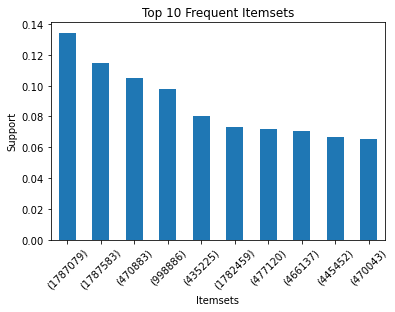

In [16]:
from mlxtend.frequent_patterns import association_rules

rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)

# 顯示關聯規則
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
rules_fp.to_csv('rules_fp.csv',index=False)

plt.figure(figsize=(10,5))
frequent_itemsets_fp.nlargest(10, 'support').plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()
